The shape of the mitbih_train is :  (52429, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


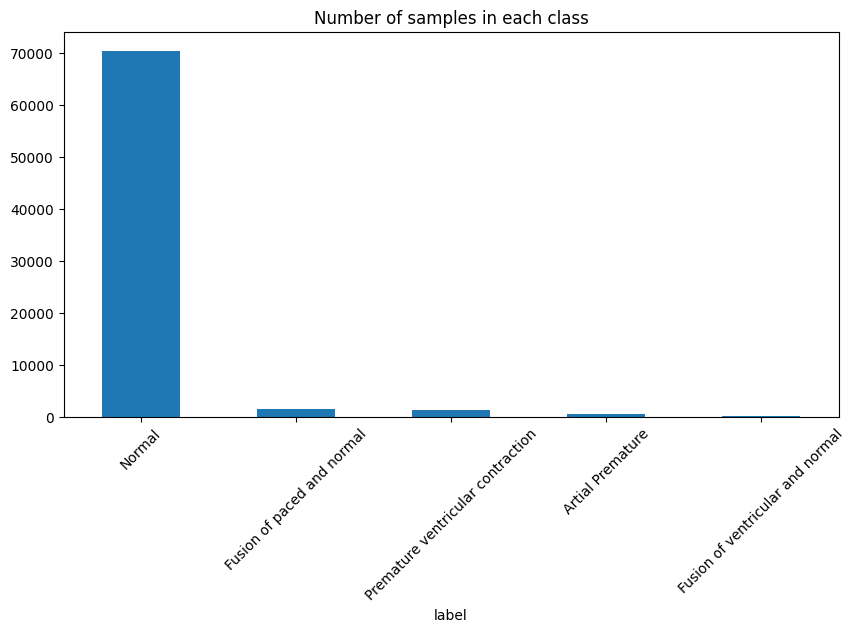

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import (
    ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
df_mitbih_train = pd.read_csv("../content/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("../content/mitbih_test.csv", header = None)

# print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)

if df_mitbih.isnull().sum().sum() > 0:
    df_mitbih = df_mitbih.dropna()

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
#df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_mitbih.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_mitbih.columns = list(time) + ["label"]

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_mitbih["label"].value_counts()
# substitute the class names
counts.index = counts.index.map(id_to_label)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 45)
plt.title("Number of samples in each class")
plt.show()


Accuracy: 0.9874
Precision: 0.9870
Recall: 0.9874
F1 Score: 0.9861
Confusion Matrix:
[[14101     3     3     0     2]
 [   59    51     1     0     0]
 [   60     0   227     2     1]
 [   18     0     3    11     0]
 [   35     0     0     0   287]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     14109
         1.0       0.94      0.46      0.62       111
         2.0       0.97      0.78      0.87       290
         3.0       0.85      0.34      0.49        32
         4.0       0.99      0.89      0.94       322

    accuracy                           0.99     14864
   macro avg       0.95      0.70      0.78     14864
weighted avg       0.99      0.99      0.99     14864



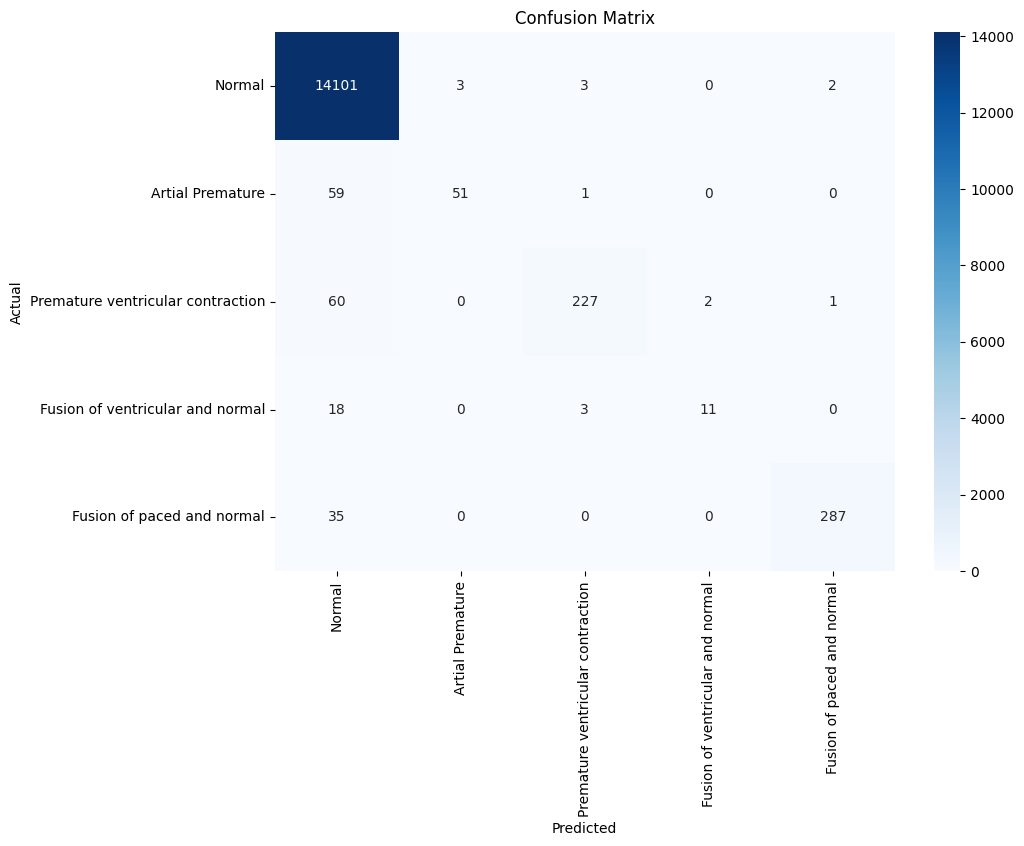

In [20]:
X = df_mitbih.drop(columns=["label"])
y = df_mitbih["label"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Train a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, max_depth=150)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average ='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
# Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 7))
ticklabels = ["Normal", "Artial Premature", "Premature ventricular contraction", "Fusion of ventricular and normal","Fusion of paced and normal"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=ticklabels, yticklabels=ticklabels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()